# Beacon Time Series, across the transition

Edit selector= below

Look at the beacons with the largest normalized spread.

In [1]:
import math
import pandas as pd
import BQhelper as bq
import matplotlib.pyplot as plt

bq.project = "mlab-sandbox"
# bq.dataset = 'mattmathis'
# bq.UnitTestRunQuery()
# bq.UnitTestWriteQuery()


In [2]:
query="""
SELECT
  a.TestTime,
  client.IP,
  a.MeanThroughputMbps,
  node._instruments
# FROM   `mlab-sandbox.mm_unified_testing.unified_downloads`
FROM `measurement-lab.ndt.unified_downloads`
WHERE client.IP in ( {clientIP} )
AND test_date > '2019-03-01'
ORDER BY TestTime

"""

In [7]:
%matplotlib nbagg
# from matplotlib import interactive
# interactive(True)
plt.ion()

clients = [
    '69.68.23.44', # Max deltaMean
    '96.229.66.58' # Max deltaMax
]


def plotMultiBeacons(clients, columns = 1, width=10):
    clist = '"'+'", "'.join(clients)+'"'
    data=bq.QueryTimestampTimeseries(query, clientIP=clist)
    rows = math.ceil(len(clients) / float(columns))
    figLen = math.ceil(width/float(columns)*rows)  # assume square

    plt.rcParams['figure.figsize'] = [width, figLen]
    for i, client in enumerate(clients):
        cdata = data[data['IP'] == client]
        cur = plt.subplot(rows, columns, i+1)
        plt.title('Beacon: '+client)
        plt.plot(cdata['MeanThroughputMbps'], 'b.')
    plt.show()
    
    
# plotMultiBeacons(clients, 2, width=10)

<IPython.core.display.Javascript object>


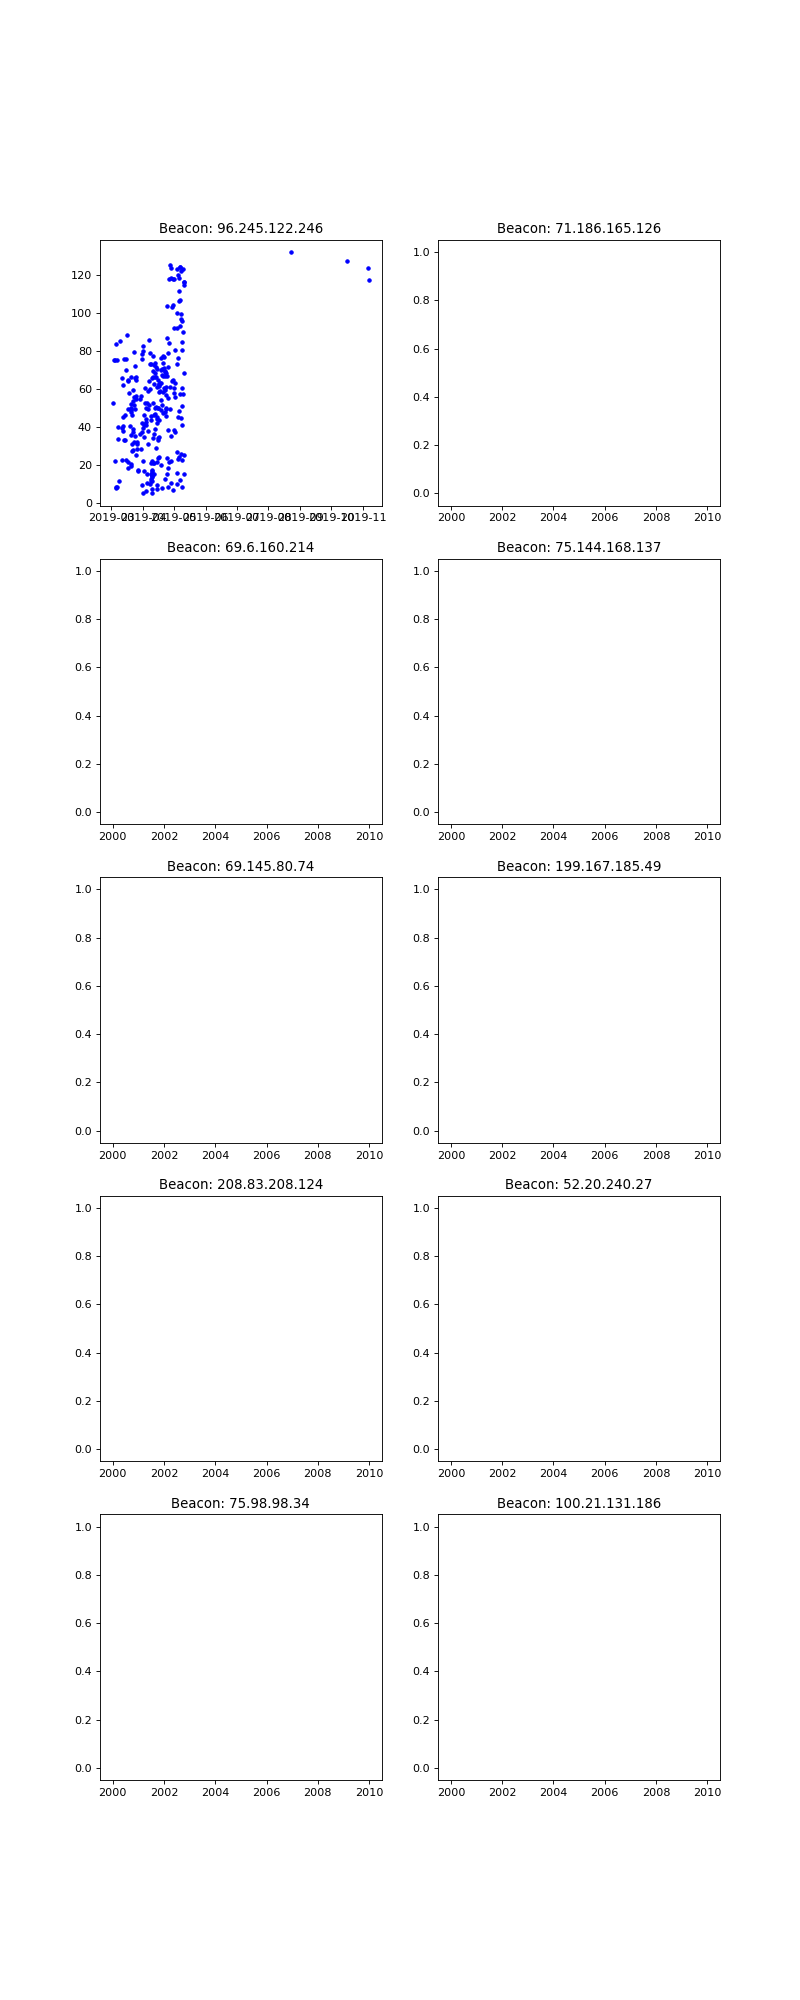

In [9]:
# Timerseries from top 10 at mlab-sandbox.mattmathis.mlab3_ddos
beacons = [
'96.245.122.246',
'71.186.165.126',
'69.6.160.214',
'75.144.168.137',
'69.145.80.74',
'199.167.185.49',
'208.83.208.124',
'52.20.240.27',
'75.98.98.34',
'100.21.131.186',
]

plotMultiBeacons(beacons, 2, width=10)

In [5]:
clist = '"'+'", "'.join(clients)+'"'
data=bq.QueryTimestampTimeseries(query, clientIP=clist)

In [6]:

print (data)

data.count(axis=1)

                                                         TestTime  \
2019-03-02 00:37:37.165520+00:00 2019-03-02 00:37:37.165520+00:00   
2019-03-02 00:43:07.570615+00:00 2019-03-02 00:43:07.570615+00:00   
2019-03-02 06:37:36.572797+00:00 2019-03-02 06:37:36.572797+00:00   
2019-03-02 06:43:07.453093+00:00 2019-03-02 06:43:07.453093+00:00   
2019-03-02 12:43:07.351764+00:00 2019-03-02 12:43:07.351764+00:00   
...                                                           ...   
2020-04-23 07:55:18.107329+00:00 2020-04-23 07:55:18.107329+00:00   
2020-04-23 08:31:23.904329+00:00 2020-04-23 08:31:23.904329+00:00   
2020-04-23 14:31:23.856643+00:00 2020-04-23 14:31:23.856643+00:00   
2020-04-23 19:55:44.396894+00:00 2020-04-23 19:55:44.396894+00:00   
2020-04-23 20:31:24.050406+00:00 2020-04-23 20:31:24.050406+00:00   

                                            IP  MeanThroughputMbps  \
2019-03-02 00:37:37.165520+00:00   69.68.23.44          412.056601   
2019-03-02 00:43:07.570615+00:0

2019-03-02 00:37:37.165520+00:00    4
2019-03-02 00:43:07.570615+00:00    4
2019-03-02 06:37:36.572797+00:00    4
2019-03-02 06:43:07.453093+00:00    4
2019-03-02 12:43:07.351764+00:00    4
                                   ..
2020-04-23 07:55:18.107329+00:00    4
2020-04-23 08:31:23.904329+00:00    4
2020-04-23 14:31:23.856643+00:00    4
2020-04-23 19:55:44.396894+00:00    4
2020-04-23 20:31:24.050406+00:00    4
Length: 3074, dtype: int64